In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
# 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.read_csv('report.csv',sep=',')
df['endpoint_type'] = le.fit_transform(df['endpoint_type'].values)
print('df[:10]',df[:10])

df[:10]                                              Dataset  #instances  #features  \
0  GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...        1600       1000   
1    GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1.csv        1600         20   
2    GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.csv        1600         20   
3    GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1.csv        1600         20   
4  GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...        1600         20   
5  GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...        1600         20   
6                         Hill_Valley_with_noise.csv        1212        100   
7                      Hill_Valley_without_noise.csv        1212        100   
8                                          adult.csv       48842         14   
9                               agaricus-lepiota.csv        8145         22   

   #binary_features  #integer_features  #float_features  endpoint_type  \
0                31                969          

In [ ]:
# histogram plot of features
import seaborn as sns
h = plt.figure()#figsize=(1,1)
plt.rcParams['figure.figsize'] = (20.0, 10.0)

for i,col in enumerate(df.columns[1:]):
#     if col == 'endpoint_type':
#         continue
    ax=plt.subplot(4,2,i+1) 
    sns.distplot(df[col],kde=False,bins=50)
    plt.yscale('log', nonposy='clip')
#     plt.set(ax,dpi=300)
# h=plt.gcf()
# 

h.tight_layout()
h.savefig('figs/data_feature_hist.pdf')
plt.show()

In [ ]:
# x, y = np.random.multivariate_normal(mean, cov, 1000).T
# with sns.axes_style("white"):
sns.jointplot(x='#instances', y='#features', data=df)#,kind="hex", color="k");



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.preprocessing import StandardScaler
import numpy
import pdb
from tqdm import tqdm
#==========
# optimal K via elbow method with silhouette score which produces a better elbow.
#==========
ss = StandardScaler()
X = ss.fit_transform(df.drop('Dataset',axis=1).values)
# pdb.set_trace()
Ks = np.arange(2,147,1)
Inertias = []
Silhouettes = []
np.random.seed(2)
# loop through k values
for K in tqdm(Ks):
	km = KMeans(n_clusters=K, init='k-means++',copy_x=False).fit(X)
	labels = km.labels_
	centers = km.cluster_centers_
	inertia = km.inertia_
	Silhouettes.append(silhouette_score(X,labels))
	# Inertias[K-1] = km.inertia_
	Inertias.append(km.inertia_)

# line plot of K versus Silhouette score with best value marked with x 
plt.figure(1)
plt.plot(Ks,Silhouettes,label='silhouette')
plt.plot(Ks[np.argmax(Silhouettes)],Silhouettes[np.argmax(Silhouettes)],marker = 'o',color='r',markersize=7)
plt.text(Ks[np.argmax(Silhouettes)]-2,Silhouettes[np.argmax(Silhouettes)],"K = "+repr(Ks[np.argmax(Silhouettes)]))
plt.ylim(0.95*np.min(Silhouettes),1.05*np.max(Silhouettes))
plt.ylabel("Average silhouette score") #Y-axis label
plt.xlabel("K") #X-axis label
plt.title("Choice of K") #Plot title
plt.tight_layout()
# plt.savefig("k_silhouette_data-features.pdf")

plt.figure(2)
plt.plot(Ks,Inertias,label='inertia')
plt.plot(Ks[np.argmin(Inertias)],Inertias[np.argmin(Inertias)],marker = 'o',color='r',markersize=7)
plt.text(Ks[np.argmin(Inertias)]-2,Inertias[np.argmin(Inertias)],"K = "+repr(Ks[np.argmin(Inertias)]))
plt.ylim(0.95*np.min(Inertias),1.05*np.max(Inertias))
plt.ylabel("Inertias") #Y-axis label
plt.xlabel("K") #X-axis label
plt.title("Choice of K") #Plot title
plt.tight_layout()
# plt.savefig("k_inertia_data-features.pdf")

k: 0
col: [ 0.61960787  0.00392157  0.25882354  1.        ]
k%nc: 0
k: 1
col: [ 0.95686275  0.42745098  0.26274511  1.        ]
k%nc: 1
k: 2
col: [ 0.99607843  0.87843138  0.54509807  1.        ]
k%nc: 2
k: 3
col: [ 0.90196079  0.96078432  0.59607846  1.        ]
k%nc: 3
k: 4
col: [ 0.40000001  0.76078433  0.64705884  1.        ]
k%nc: 4
k: 5
col: [ 0.36862746  0.30980393  0.63529414  1.        ]
k%nc: 5
k: 0
col: [ 0.61960787  0.00392157  0.25882354  1.        ]
k%nc: 0
k: 1
col: [ 0.95686275  0.42745098  0.26274511  1.        ]
k%nc: 1
k: 2
col: [ 0.99607843  0.87843138  0.54509807  1.        ]
k%nc: 2
k: 3
col: [ 0.90196079  0.96078432  0.59607846  1.        ]
k%nc: 3
k: 4
col: [ 0.40000001  0.76078433  0.64705884  1.        ]
k%nc: 4
k: 5
col: [ 0.36862746  0.30980393  0.63529414  1.        ]
k%nc: 5
labels: [0 0 0 0 0 0 4 4 0 0 3 3 3 3 0 0 1 0 0 0 0 0 0 1 0 1 1 0 3 3 0 1 3 1 0 0 0
 0 0 0 1 1 1 1 1 0 3 2 2 2 4 4 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 3 5 1 1 0 1 1
 0 1 1 0 0 0 1 1 0 0 3 0 1

/home/bill/anaconda3/lib/python3.5/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


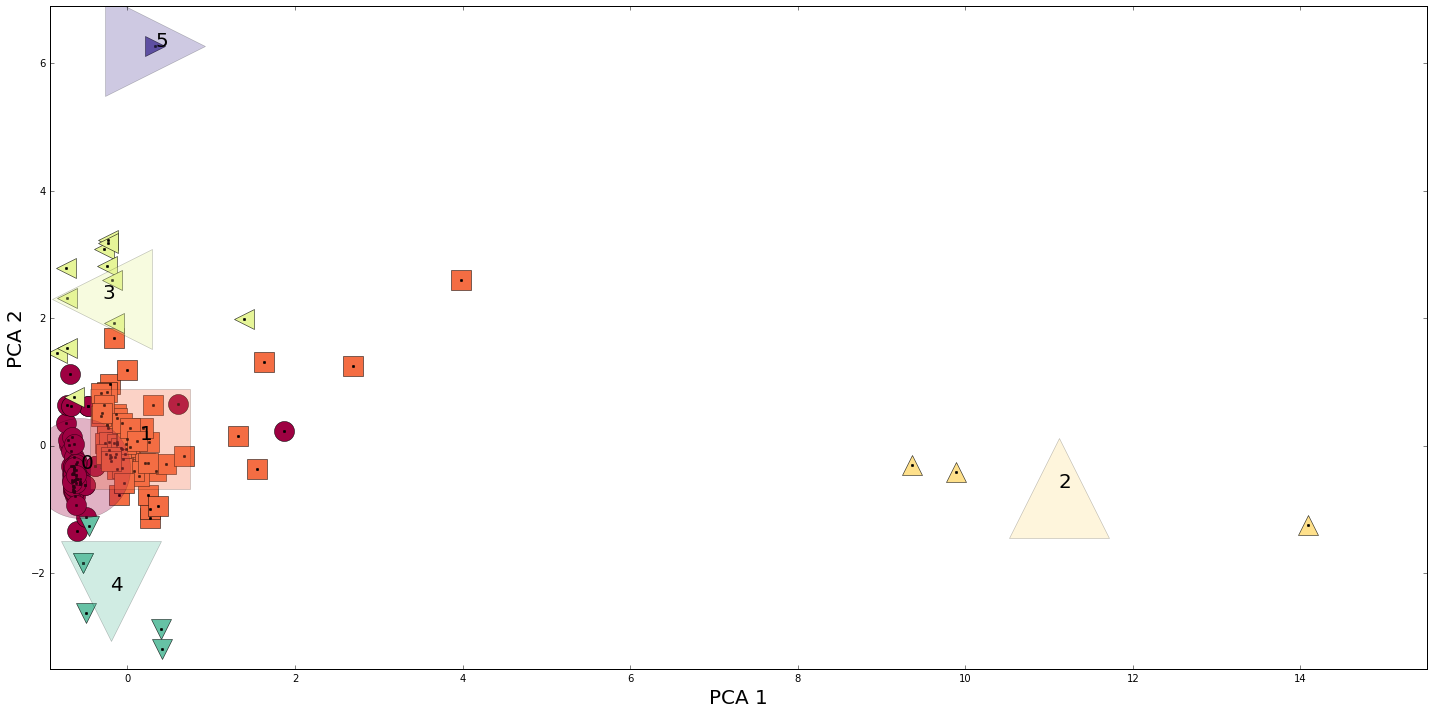

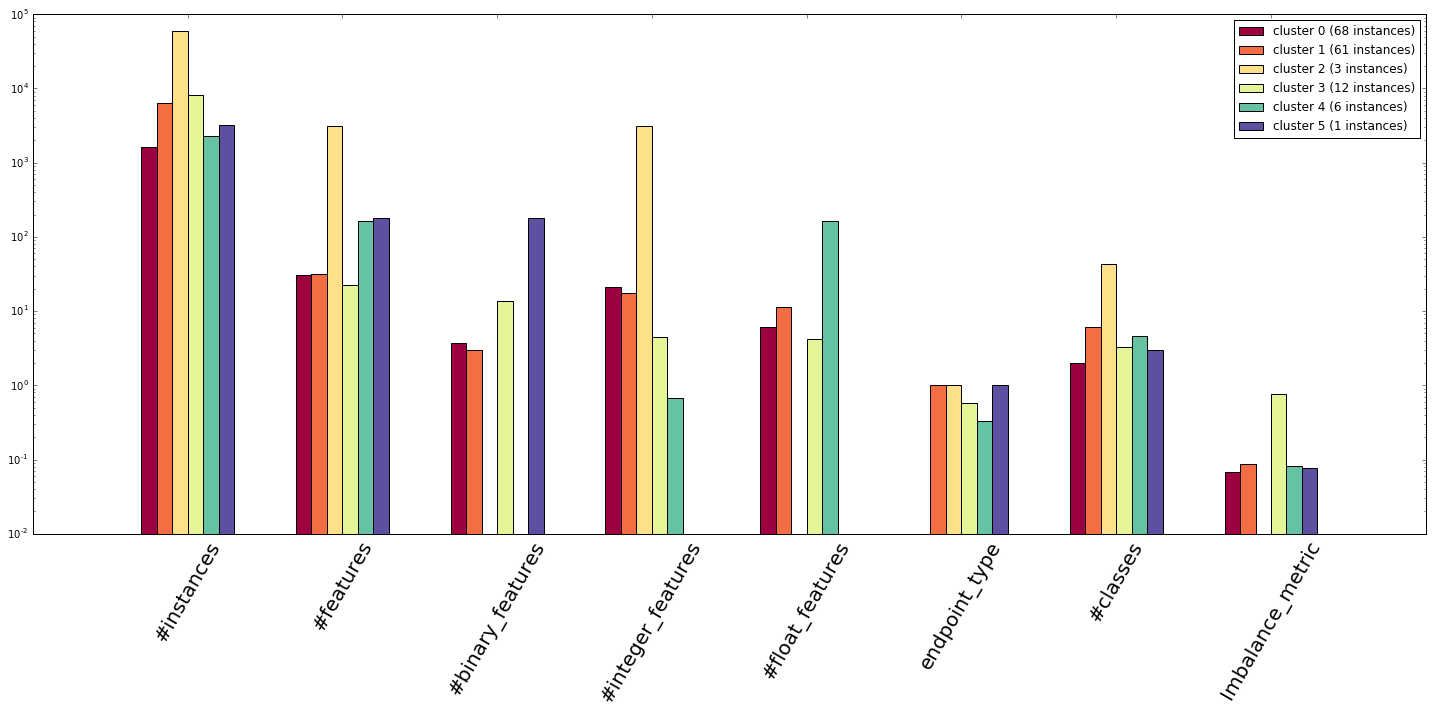

In [2]:
# =====
# plot cluster centers on 2 principal component axes
# =====
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import pdb
%matplotlib inline 
plt.rcParams['figure.figsize'] = (20.0, 10.0)

marker =( 'o','s','^','<','v','>','+', 'x','*') 
h = plt.figure()

ss = StandardScaler()
X = ss.fit_transform(df.drop('Dataset',axis=1).values)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

nc = 6
np.random.seed(42)
km = KMeans(n_clusters=nc, init='k-means++',copy_x=False,max_iter=1000).fit(X)
labels = km.labels_
centers = km.cluster_centers_

# centers_pca = centers
centers_pca = pca.transform(centers)

colors = plt.cm.Spectral(np.linspace(0, 1, nc))
for k, col in zip(np.unique(labels), colors):
    print('k:',k)
    print('col:',col)
    print('k%nc:',k%nc)
    label_mask = (k==labels)
    xy = X_pca[label_mask]
    plt.plot(xy[:,0], xy[:, 1], linestyle = '', marker=marker[k%nc], markerfacecolor=col, markersize=20, alpha=1)

plt.plot(X_pca[:,0], X_pca[:, 1], linestyle = '',marker='.', markerfacecolor='k', markersize=5, alpha=1)

for k, col in zip(np.unique(labels), colors): 
    print('k:',k)
    print('col:',col)
    print('k%nc:',k%nc)
    plt.plot(centers_pca[k,0],centers_pca[k,1], linestyle='', marker=marker[k%nc], markerfacecolor=col,markersize=100,alpha=0.3)
    plt.text(centers_pca[k,0],centers_pca[k,1],str(k),fontsize=20)

print('labels:',labels)
print('centers:',centers_pca,len(centers_pca))

plt.xlim(min(X_pca[:,0])*1.1,max(X_pca[:,0])*1.1)
plt.ylim(min(X_pca[:,1])*1.1,max(X_pca[:,1])*1.1)
ax = plt.gca()
ax.set_axis_bgcolor('white')        
plt.xlabel('PCA 1',fontsize=20)
plt.ylabel('PCA 2',fontsize=20)
plt.tight_layout()
h.savefig('figs/k_means_PCA_data_by_features.pdf')


# show kmeans cluster center values for different features. 
print('features:',df.columns[1:])
for k in np.unique(labels):
    print('label',k)
    label_mask = (k==labels)
    xk_mean = np.mean(ss.inverse_transform(X[label_mask]),axis=0)
    for i,f in enumerate(df.columns[1:]):
        print('\t{}:\t{}'.format(f,np.round(xk_mean[i],3)))

h2 = plt.figure()
features = df.columns[1:].values
for k,col in zip(np.unique(labels),colors):
    label_mask = (k==labels)
    coverage = np.sum(label_mask)
    xk_mean = np.mean(ss.inverse_transform(X[label_mask]),axis=0)
    offset = k*0.1-np.mean(np.unique(labels))*0.1
    plt.bar(np.arange(len(features))+offset,xk_mean,align='center',width=0.1,color=col,log=True,label='cluster '+str(k)+' ('+str(coverage)+' instances)')
# pdb.set_trace()
plt.gca().set_xticks(np.arange(len(features)))
plt.gca().set_xticklabels(list(features),fontsize=20,rotation=60)
plt.legend()
plt.tight_layout()
h2.savefig('figs/cluster_features.pdf')
plt.show()

In [ ]:
#tsne manifold learning for visualizing the data
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df.drop('Dataset',axis=1).values

tsne = TSNE(n_components=2,random_state=42)

X_tsne = tsne.fit_transform(X)
# get colors from KMeans labels
nc = 6
np.random.seed(42)
km = KMeans(n_clusters=nc, init='k-means++',copy_x=False,max_iter=1000).fit(X)
labels = km.labels_
colors = plt.cm.Spectral(np.linspace(0, 1, nc))
color=[]
for l in labels:
    color.append(colors[l])
    
h = plt.figure()
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=color, cmap=plt.cm.Spectral)
h.savefig('tsne.pdf')
plt.show()